#  Lead Scoring for X Education
#### A case study in Logistic Regression

### <span style="color:black"> Problem Statement

An education company named X Education sells online courses to industry professionals. The professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. The company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

### <span style="color:back"> Objective: 

The objective is to help X Education select the most promising leads by building a model and assigning a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### 1. Import Libraries and Initial Data Analysis

In [1459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [1460]:
# Read the dataset Leads.csv

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1461]:

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1462]:
# Take a copy of the original dataset to assign the Lead score to the original rows. 

df_orig = df.copy()

###  Summary Data Analysis

In [1463]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [1464]:
df.shape

(9240, 37)

In [1465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###  Data Imbalance Analysis

**To check the balance of data with respect to the target variable - 'Converted'**

In [1466]:
# Dividing the dataset into two dataset with Converted = 0 and Converted = 1

df_0=df.loc[df["Converted"]==0]
df_1=df.loc[df["Converted"]==1]

In [1467]:
# Calculating Imbalance percentage 
# Since the majority is target0 and minority is target1
print (f'Count of Not Converted = 0: {len(df_0)} \nCount of Converted = 1: {len(df_1)}')
print (f'Imbalance Ratio is : {round(len(df_0)/len(df_1),2)}')

Count of Not Converted = 0: 5679 
Count of Converted = 1: 3561
Imbalance Ratio is : 1.59


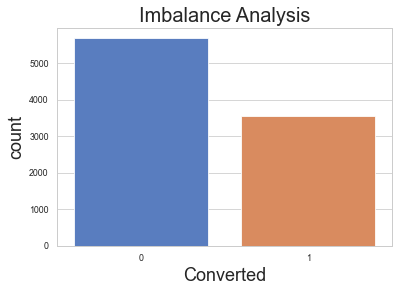

In [1468]:
# Plotting the imbalance Analysis:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (6,4))
plt.title('Imbalance Analysis',  fontsize=20)
chart = sns.countplot(data=df, x='Converted', palette='muted')
plt.xlabel('Converted', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.show()

`Inferences` The data is not too much imbalanced. As such, we can proceed with the data for analysis and model building

##  2. Data Cleaning 

- Steps to be performed:
1. Replace the 'Select' value in the categorical values to NaN. 
2. Check Percentage of Missing values for all columns
3. Drop columns with a high percentage of missing values
4. Drop categorical columns that are highly skewed
5. Impute columns with less percentage of missing values
6. We can also drop the columns that were completed by the Sales team after progressing with the leads. 

#### Convert 'Select' values to NaN

Replace the 'Select' value in the categorical values to NaN. These values are mostly from dropdown menus where nothing is selected

In [1469]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

#### Drop the duplicate rows if any

In [1470]:
row1 , column1 = df.shape[0], df.shape[1]

# delete duplicates
df = df.drop_duplicates() 

#### Calculate the percentage of the retained rows

In [1471]:
row2 , column2 = df.shape[0], df.shape[1]

percentRows = round ((row2/row1 * 100), 2)
print (f'Rows retained after Duplicate Deletion: {row2} or {percentRows} percent')

Rows retained after Duplicate Deletion: 9240 or 100.0 percent


### Finding missing values and deleting the  columns with a lot of missing values

For our analysis, we have to find the columns with missing values and handle them by either deleting or imputing. 

**Define a function to get the missing values and missing percentage for the dataframes.**

In [1472]:
# To find percent of Nan values
# We can define a function to get the missing values and missing percentage for the dataframes.
def missing_data(data):
    count_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = (data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)
    missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                 'percent_missing': percent_missing})
    return missing_value_df

In [1473]:
#To find percent of Nan values 
missing_data(df).head(20)

,count_missing,percent_missing
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


###  Drop the unwanted variables 

Since we do not need all the columns provided in the dataset for our analysis, we can drop some of the columns based on our analysis.  

#### Drop Prospect ID and Lead Number as they are unique identifiers and need not be used in prediction

Clearly Prospect ID and Lead Number are two variables that represent the unique identfier of the Contacted People and as such will not add value to the model. These columns can be dropped. 

In [1474]:
# To check if there are any duplicate values in Prospect ID and Lead Number columns

print (f'Duplicates in Prospect ID - {any(df["Prospect ID"].duplicated())}')
print (f'Duplicates in Lead Number - {any(df["Lead Number"].duplicated())}')

Duplicates in Prospect ID - False
Duplicates in Lead Number - False


In [1475]:
# Dropping the columns as mentioned in the above comment. 
dropFeatures = ['Prospect ID', 'Lead Number']
df.drop(df[dropFeatures], axis=1, inplace=True)

#### Create a funtion to drop the columns with a certain percentage of NaN values

We can drop certain columns with more than certain percentage of missing values. As they have high value of missing percentage, they will not be indicative of the correct weight of the columns in prediction.

In [1476]:
# we will drop the columns having more than 70% NA values.
def drop_columns(data, miss_per):
    cols_to_drop = list(round(100*(data.isnull().sum()/len(data.index)), 2) >= miss_per )
    dropcols = data.loc[:,cols_to_drop].columns
    print (f'Features dropping now: {dropcols}')
    data = data.drop(dropcols, axis=1)
    return data

#### Drop the columns with more than 70% NaN values (Almost null values)

In [1477]:
df = drop_columns(df, 70.0)

Features dropping now: Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')


**Analysis of Score columns assigned by the Sales Team**

The following are the score columns assigned by the sales team to the dataset after progressing with the leads. 
These columns can be dropped as they will not add to the model building. 

Analyse the following features before dropping them. 

* Lead Quality 
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score

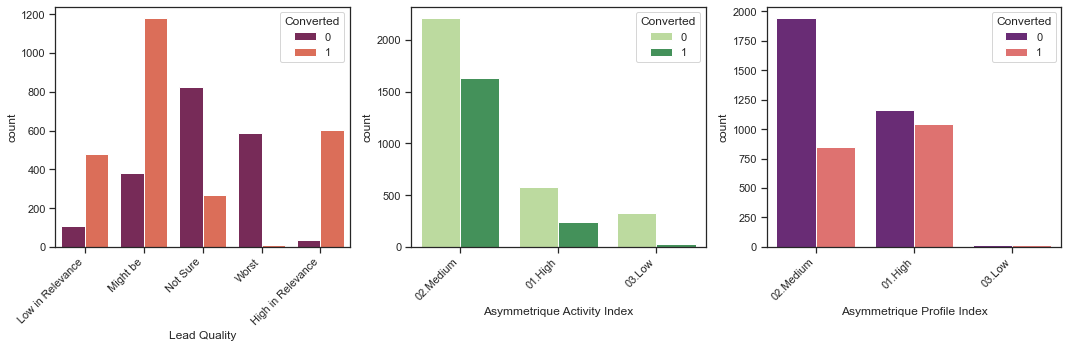

In [1478]:
# Analyse the score columns assigned by the sales team to the dataset before dropping them

scoreFeatures = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index' ]

# Count plot for the categorical variables
sns.set(style='ticks',color_codes=True)
colors =['rocket', 'YlGn' , 'magma']

plt.figure(figsize = (15,5))
for i in enumerate(scoreFeatures):
    plt.subplot(1, 3, i[0]+1)
    chart = sns.countplot(x = i[1], hue = 'Converted', data = df, palette = colors[i[0]])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right',)
    plt.tight_layout()

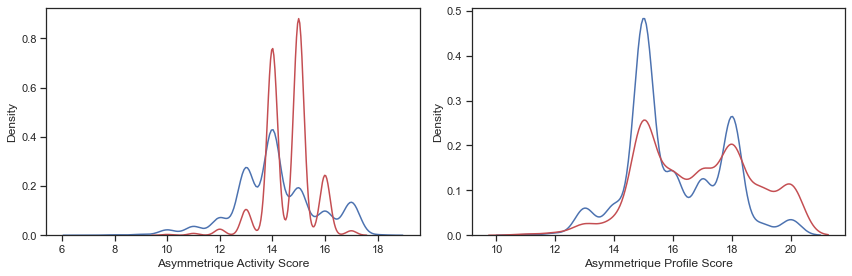

In [1479]:
# Analyse the score columns assigned by the sales team to the dataset

fig, axis = plt.subplots(1, 2, figsize = (12,4))
plt1 = sns.distplot(df_0['Asymmetrique Activity Score'], hist=False, kde=True , color='b' , ax = axis[0])
plt1 = sns.distplot(df_1['Asymmetrique Activity Score'], hist=False, kde=True , color='r' , ax = axis[0])
plt2 = sns.distplot(df_0['Asymmetrique Profile Score'], hist=False, kde=True , color='b' , ax = axis[1])
plt2 = sns.distplot(df_1['Asymmetrique Profile Score'], hist=False, kde=True , color='r' , ax = axis[1])
plt.tight_layout()

#### Drop the columns with more than 45% NaN values

As all the score features have more than 45% Nan values, these can be dropped without affecting our analysis. 

In [1480]:
# Drop the score columns assigned by the sales team to the dataset

df = drop_columns(df, 45.0)

Features dropping now: Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [1481]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

* **Drop the columns 'Tag' and 'Last Activity' as the columns are added by Sales team while working on the leads and does not directly contribute to identifying the hot leads**

In [1482]:
# Drop the unwanted features
dropFeatures = ['Tags', 'Last Notable Activity']

df.drop(dropFeatures, axis=1, inplace=True)

---------------

## <span style="color:grey"> 3. EDA and Data Visualizations for futher analysis

The next step is to visualise the data using matplotlib and seaborn.

This is one of the most important step - understanding the data. This step will help us understand the properties of data.

* Helps to identify any outliers.
* If there is some obvious multicollinearity going on, this can be identified here.
* Identify the data types of the features and make any conversions if needed.
    
### <span style="color:grey"> Check the data types of all the columns and make changes if needed

* The Constant features can be removed. Constant features are those features that have only one value.
* The Categorical features should be identified to create the Dummy variables for them later.
* The Boolean features ('Yes' or 'No' features) can be mapped to 0 and 1 to prepare them for modeling. 

**Delete the constant features**

Constant features are the type of features that contain only one value for all the outputs in the dataset. Constant features provide no information that can help in classification of the record at hand.Therefore, it is advisable to remove all the constant features from the dataset.

In [1483]:
# A function to find the constant features. 

def find_constant_features(df):
    constFeatures = []
    for column in list(df.columns):
        if df[column].unique().size < 2:
            constFeatures.append(column)
    return constFeatures

constFeatures = find_constant_features(df)
print(constFeatures)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [1484]:
# Drop the constant features as they will not add value to the analysis

df = df.drop(constFeatures, axis=1)

In [1485]:
df.shape

(9240, 21)

#### Identify the number of unique features in a column

In [1486]:
# Look at the number of unique categories in a column
def unique_count(data):
    data_type = data.dtypes
    unique_count = data.nunique()
    
    unique_count_df = pd.DataFrame({'data_type': data_type,
                                 'unique_count': unique_count})
    return unique_count_df

In [1487]:
unique_count(df).transpose() # Used transpose so as to avoid using more space. `

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
data_type,object,object,object,object,int64,float64,int64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object
unique_count,5,21,2,2,2,41,1731,114,17,38,18,6,3,2,2,2,2,2,2,6,2


#### Identify all the Categorical, boolean and numeric features

In [1488]:
# Identify and separate all the Categorical, boolean and numeric features for analysis
targetFeature = []
catFeatures = []
boolFeatures = []
numFeatures = []

for each in df.columns:
    if each in ('Converted'):
        targetFeature.append(each)
    elif df[each].nunique() == 2:  #Features with only 2 unique values as boolean
        boolFeatures.append(each)
    elif df[each].dtype == 'object':
        catFeatures.append(each)
    elif df[each].dtype in ('int64','float64'):
        numFeatures.append(each)
    else:
        numFeatures.append(each)

In [1489]:
print (f'The Target Feature is : \n {targetFeature} \n')
print (f'The Boolean Features are : \n {boolFeatures} \n')
print (f'The Categorical Features are : \n {catFeatures} \n')
print (f'The Numeric Features are :\n {numFeatures} \n')

The Target Feature is : 
 ['Converted'] 

The Boolean Features are : 
 ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview'] 

The Categorical Features are : 
 ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City'] 

The Numeric Features are :
 ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] 



### <span style="color:grey">Univariate Analysis of Boolean Features

* Convert the values 'Yes' and 'No' to 1 and 0 in the Binary Features. 
* Check if the columns are skewed and drop them if they are skewed.

In [1490]:
boolFeatures

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [1491]:
# Convert the values 'Yes' and 'No' to 1 and 0 in the Binary Features. 
# value_counts is checked each time to ensure the mapping is done only once 
# If mapped multiple times, the values are converted to NaNs

for each in boolFeatures:
    if df[each].value_counts().values.sum() > 0:  # To check if the step was already completed
        df[each] = df[each].map(dict(Yes=1, No=0))
        print (f'Binary mapping is completed for {each}')

Binary mapping is completed for Do Not Email
Binary mapping is completed for Do Not Call
Binary mapping is completed for Search
Binary mapping is completed for Newspaper Article
Binary mapping is completed for X Education Forums
Binary mapping is completed for Newspaper
Binary mapping is completed for Digital Advertisement
Binary mapping is completed for Through Recommendations
Binary mapping is completed for A free copy of Mastering The Interview


In [1492]:
# Convert the boolean features to type boolean
df[boolFeatures] = df[boolFeatures].astype('int64')

In [1493]:
boolFeatures

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [1494]:
df.shape

(9240, 21)

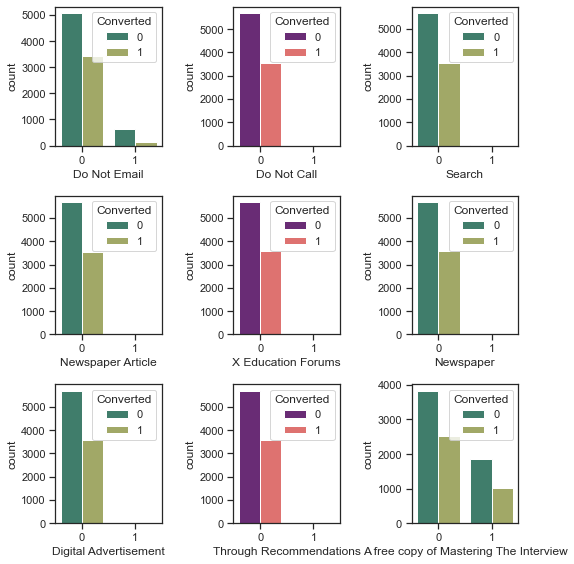

In [1495]:
# Count plot for the Boolean variables
# colors = ['Accent', 'PiYG' , 'RdPu', 'icefire' , 'ocean' , 'gist_earth', 'magma', 'plasma', 'rocket']
colors = ['gist_earth', 'magma', 'gist_earth'] * 3
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (16,12))
for i, x_var in enumerate(boolFeatures):
    plt.subplot(3, 3, i+1)
    chart = sns.countplot(x = x_var, data = df, hue='Converted', palette=colors[i])
    chart.set_xticklabels(chart.get_xticklabels())
    plt.tight_layout()

In [1496]:
# Identify the value counts of the boolean features to confirm if they have only one value

for each in boolFeatures:
    print (df[each].value_counts(dropna=False))

0    8506
1     734
Name: Do Not Email, dtype: int64
0    9238
1       2
Name: Do Not Call, dtype: int64
0    9226
1      14
Name: Search, dtype: int64
0    9238
1       2
Name: Newspaper Article, dtype: int64
0    9239
1       1
Name: X Education Forums, dtype: int64
0    9239
1       1
Name: Newspaper, dtype: int64
0    9236
1       4
Name: Digital Advertisement, dtype: int64
0    9233
1       7
Name: Through Recommendations, dtype: int64
0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64


#### Observations:

* Only two fields, 'A free copy of Mastering The Interview' and 'Do Not Email' have values for 1 and 0
* All the other binary features have a very high percent of values as No.
* We can drop these columns as they will not contribute to the analysis.

In [1497]:
# we can drop the boolean Features with most values as 0 as they all have the value True and do not help in the analysis

dropFeatures = [ 'Do Not Call',
                 'Search',
                 'Newspaper Article',
                 'X Education Forums',
                 'Newspaper',
                 'Digital Advertisement',
                 'Through Recommendations']

In [1498]:
# Drop the unwanted features

df.drop(dropFeatures, axis=1, inplace=True)

In [1499]:
#To find percent of Nan values 
missing_data(df).head(10)

,count_missing,percent_missing
City,3669,39.71
Specialization,3380,36.58
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
Page Views Per Visit,137,1.48
TotalVisits,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
A free copy of Mastering The Interview,0,0.00


In [1500]:
df.shape

(9240, 14)

### <span style="color:grey">EDA and missing values handling for the Numeric Features

In [1501]:
numFeatures

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

<Figure size 1080x1080 with 0 Axes>

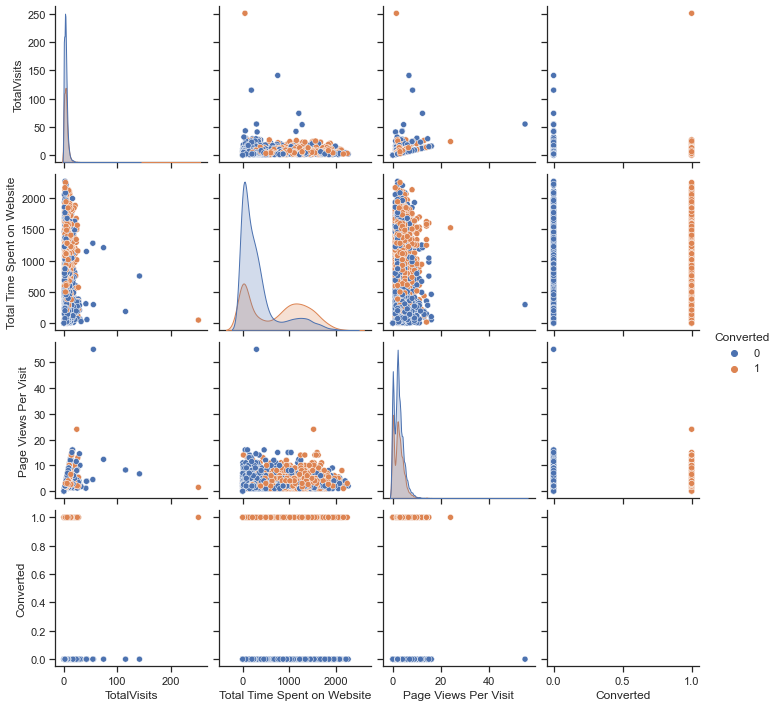

In [1502]:
# Analyze the numeric features

sns.set(style='ticks',color_codes=True)
fig = plt.figure(figsize = (15, 15))
g = sns.pairplot(data=df, hue='Converted', vars=numFeatures + targetFeature);

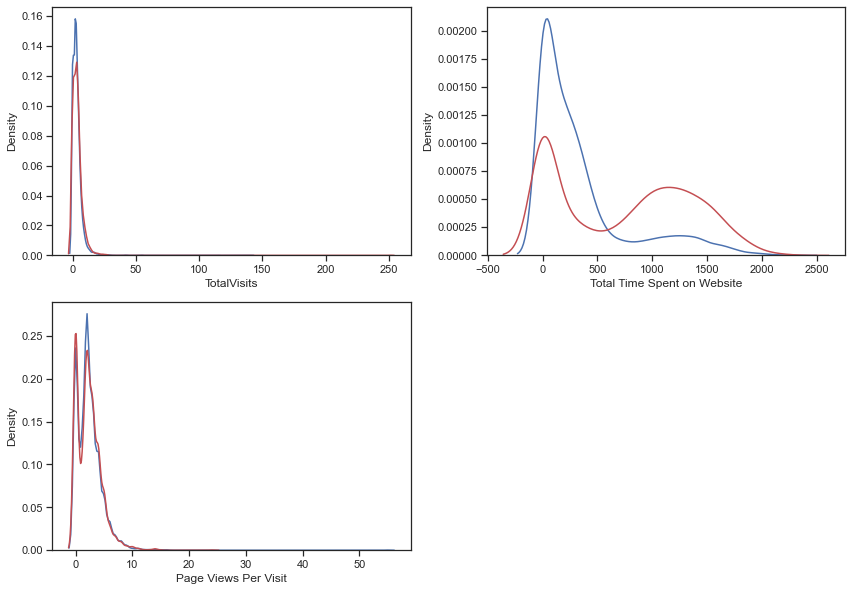

In [1503]:
# Frequency Ditribution for Numeric Features
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (12, 12))
for i, x_var in enumerate(numFeatures):
    plt.subplot(3, 2, i+1)
    sns.distplot(df_0[x_var], hist=False, kde=True , color='b')
    sns.distplot(df_1[x_var], hist=False, kde=True , color='r')
    plt.tight_layout()

In [1504]:
df.Converted.dtype

dtype('int64')

In [1505]:
numFeatures

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

#### Outlier Handling for the Numeric Features

The features 'TotalVisits', 'Page Views Per Visit' have outliers and they can be capped at 0.01 and 0.99 th quantiles

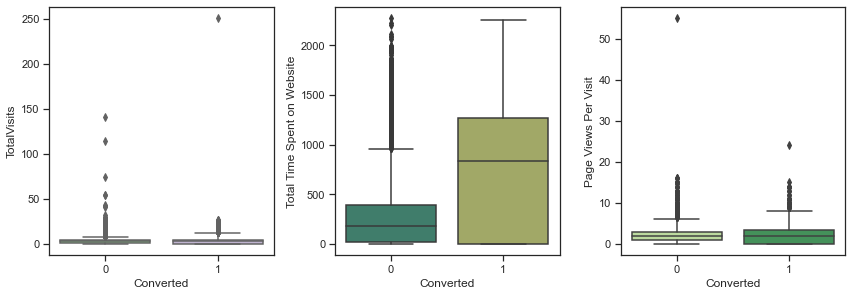

In [1506]:
# Box plot to identify the outliers
# Frequency Ditribution for Numeric Features
sns.set(style='ticks',color_codes=True)
colors = ['Accent', 'gist_earth' , 'YlGn']
plt.figure(figsize = (12, 12))
for i, var in enumerate(numFeatures):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Converted', y = var, data = df, palette =colors[i])
    plt.tight_layout()

In [1507]:
cap_outliers = ['TotalVisits', 'Page Views Per Visit']

In [1508]:
# Cap the outliers for the Numeric features at 0.01 and 0.99

for i, var in enumerate(cap_outliers):
    q1 = df[var].quantile(0.01)
    q4 = df[var].quantile(0.99)
    df[var][df[var]<=q1] = q1
    df[var][df[var]>=q4] = q4

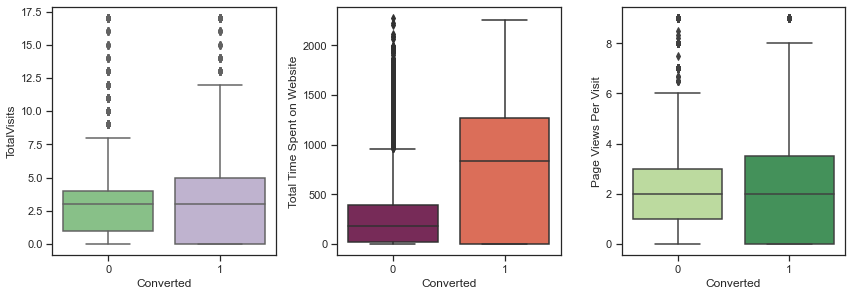

In [1509]:
# Box plot to visualise numeric features after outlier capping
sns.set(style='ticks',color_codes=True)
colors = ['Accent', 'rocket' , 'YlGn'] # 'icefire' , 'ocean' , 'gist_earth', 'magma', 'prism', 'rocket', 'seismic']
plt.figure(figsize = (12, 12))
for i, var in enumerate(numFeatures):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'Converted', y = var, data = df, palette=colors[i])
    plt.tight_layout()

#### Impute the missing values with mean for 'TotalVisits' and 'Page Views Per Visit' 

* After the outlier handling, the mean of the columns for the columns 'TotalVisits' and 'Page Views Per Visit' are same for 
  converted and non converted leads. 
* We can impute the missing values with mean for the columns.

In [1510]:
# Impute the missing values for the columns with Mean

df['TotalVisits'].fillna((df['TotalVisits'].mean()), inplace=True)
df['Page Views Per Visit'].fillna((df['Page Views Per Visit'].mean()), inplace=True)

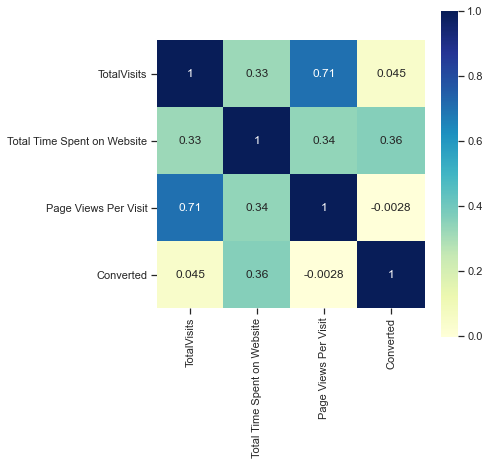

In [1511]:
# Correlation Heat map for the numeric features

corrFeatures = numFeatures + targetFeature

sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (6,6))

sns.heatmap(df[corrFeatures].corr(), cmap="YlGnBu", annot=True, square=True)
plt.show()

In [1512]:
numFeatures

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

### <span style="color:grey">EDA and Data analysis for Categorical Features

In [1513]:
# Identify the Unique Counts for the categorical Features

unique_count(df[catFeatures]).transpose() # Used transpose so as to avoid using more space. `

,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City
data_type,object,object,object,object,object,object,object,object
unique_count,5,21,17,38,18,6,3,6


In [1514]:
catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

In [1515]:
unique_count(df[catFeatures]).sort_values(by = 'unique_count', ascending=False)

,data_type,unique_count
Country,object,38
Lead Source,object,21
Specialization,object,18
Last Activity,object,17
What is your current occupation,object,6
City,object,6
Lead Origin,object,5
What matters most to you in choosing a course,object,3


In [1516]:
catFeatures[:4]
catFeatures[4:]

['Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

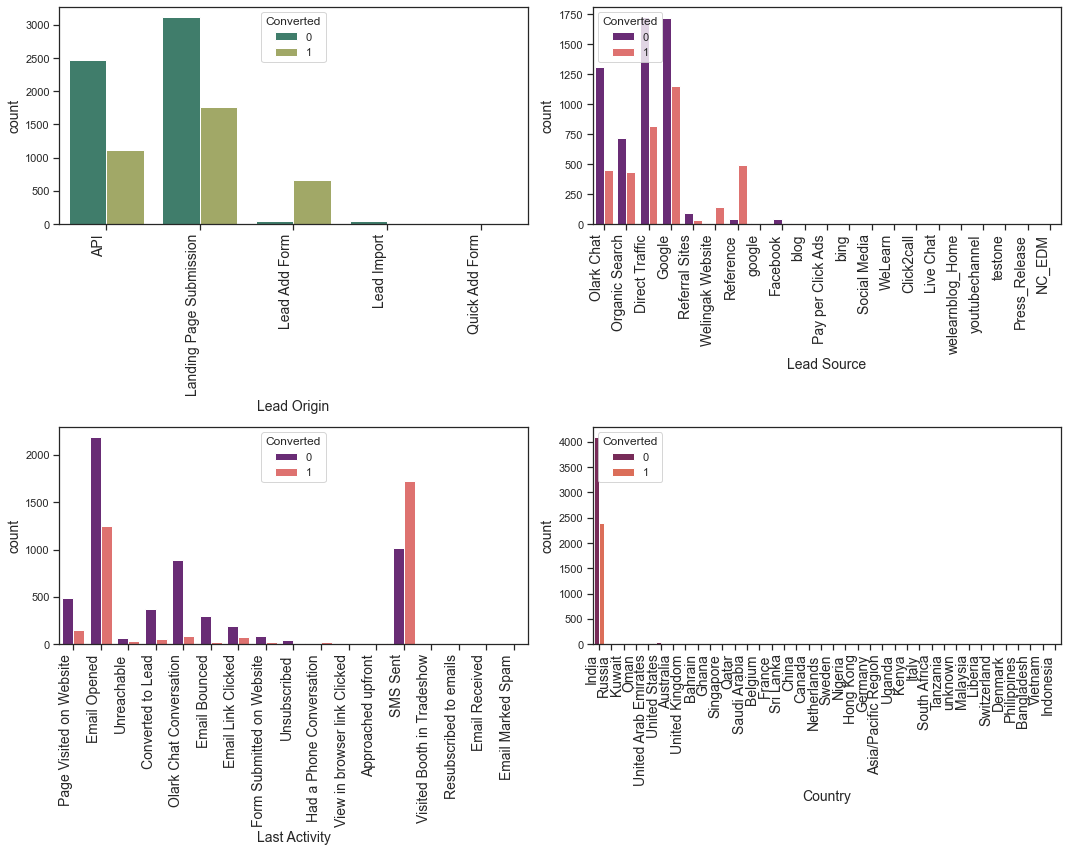

In [1517]:
# Count plot for the categorical variables
sns.set(style='ticks',color_codes=True)
# colors =['Accent', 'PiYG' , 'RdPu', 'icefire' , 'ocean' , 'gist_earth', 'magma', 'prism', 'rocket', 'seismic']
colors =['gist_earth', 'magma', 'magma', 'rocket'] * 2
plt.figure(figsize = (15,12))
for i, x_var in enumerate(catFeatures[:4]):
    plt.subplot(2, 2, i+1)
    chart = sns.countplot(x = x_var, hue = 'Converted', data = df, palette = colors[i])
    chart.set_xticklabels(chart.get_xticklabels(), fontsize=14, rotation=90, ha='right',)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel('count', fontsize=14)
    plt.tight_layout()

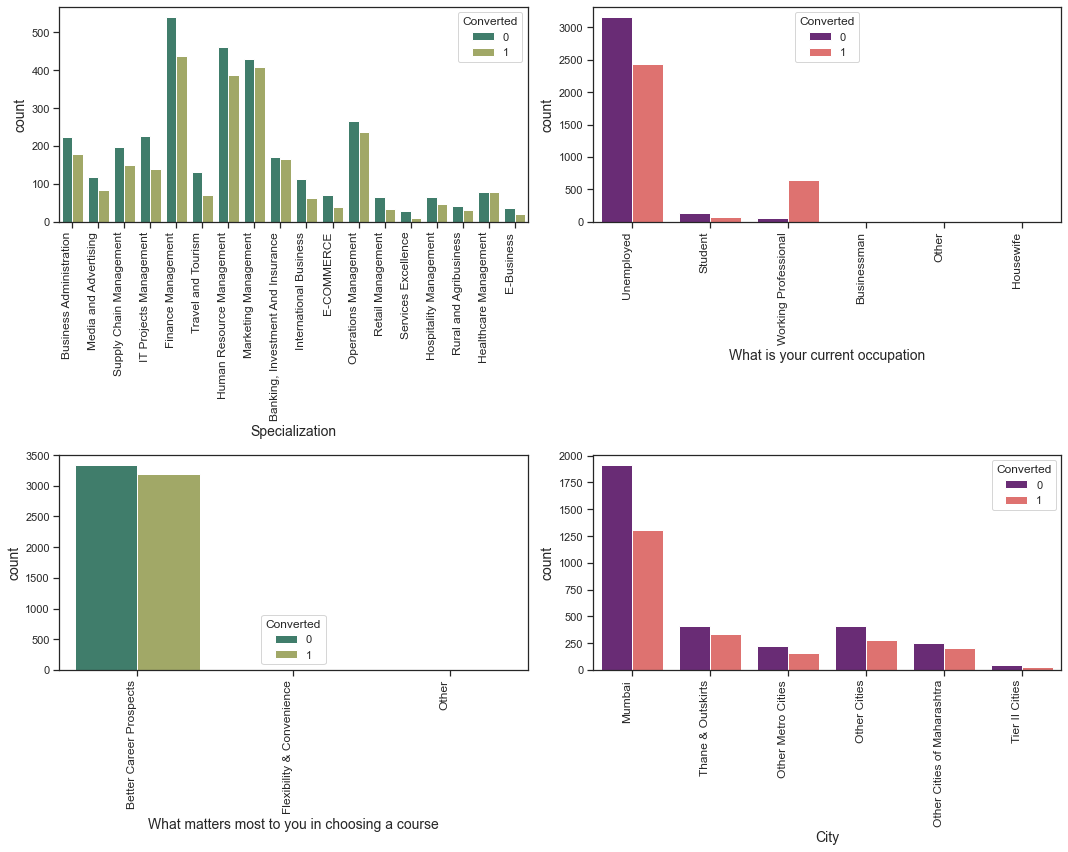

In [1518]:
# Count plot for the categorical variables
sns.set(style='ticks',color_codes=True)
# colors =['Accent', 'PiYG' , 'RdPu', 'icefire' , 'ocean' , 'gist_earth', 'magma', 'prism', 'rocket', 'seismic']
colors =['gist_earth', 'magma', 'gist_earth', 'magma'] * 2
plt.figure(figsize = (15,12))
for i, x_var in enumerate(catFeatures[4:]):
    plt.subplot(2, 2, i+1)
    chart = sns.countplot(x = x_var, hue = 'Converted', data = df, palette = colors[i])
    chart.set_xticklabels(chart.get_xticklabels(), fontsize=12, rotation=90, ha='right',)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel('count', fontsize=14)
    plt.tight_layout()

#### Drop the unwanted columns: 
* **Drop the columns 'Country' and 'What matters most to you in choosing a course' as these are highly skewed**


In [1519]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [1520]:
dropFeatures = ['Country', 'What matters most to you in choosing a course']

df.drop(dropFeatures, axis=1, inplace=True)

In [1521]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [1522]:
catFeatures = []

for each in df.columns:
    if df[each].dtype == 'object':
        catFeatures.append(each)

catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City']

#### Replace the values with better meaning/mode in the categories for categorical columns

In [1523]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

#### Replace the missing values for 'City' column with the mode

In [1524]:
# Replace all the NaN values for categorical variables
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [1525]:
for each in catFeatures:
    print (f'Value Counts for {each}: \n {df[each].value_counts(dropna=False)} \n')

Value Counts for Lead Origin: 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Value Counts for Lead Source: 
 Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
youtubechannel          1
blog                    1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64 

Value Counts for Last Activity: 
 Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on W

#### Bucketing the categories with lesser count for the categorical features

In [1526]:
# Since there are so many categories in the categorical features with less than 2% counts each, we can 
# combine all those categories into one category called 'Others'

for each in catFeatures:
    replaceFeatures = []
    categories = df[each].value_counts()
    list1 = df[each].value_counts().keys().tolist()
    for i, v in enumerate (categories):
        if v <= 200:  ## Anything less than 200
            replaceFeatures.append(list1[i])
    df[each] = df[each].replace(replaceFeatures, 'Others')
    print (f'Categories replaced for column {each} are: \n {replaceFeatures} \n')

Categories replaced for column Lead Origin are: 
 ['Lead Import', 'Quick Add Form'] 

Categories replaced for column Lead Source are: 
 ['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call', 'Live Chat', 'Social Media', 'Press_Release', 'Pay per Click Ads', 'youtubechannel', 'testone', 'blog', 'WeLearn', 'NC_EDM', 'welearnblog_Home'] 

Categories replaced for column Last Activity are: 
 ['Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Resubscribed to emails', 'Visited Booth in Tradeshow'] 

Categories replaced for column Specialization are: 
 ['International Business', 'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business', 'Services Excellence'] 

Categories replaced for column What is your current occupation are: 
 ['Other', 'Housewife', 'Businessman'] 

Categories 

#### Replace the missing values with 'Missing' category for categorical columns

In [1527]:
# Replace all the NaN values with 'Missing' for the remaining Categorical variables with NaN in them
nanFeatures = ['Specialization', 'What is your current occupation', 'Lead Source', 'Last Activity']

for each in nanFeatures:
    df[each].replace(np.nan,'Missing', inplace=True)
    print (f'NaNs are converted to "Missing" category for column {each}')

NaNs are converted to "Missing" category for column Specialization
NaNs are converted to "Missing" category for column What is your current occupation
NaNs are converted to "Missing" category for column Lead Source
NaNs are converted to "Missing" category for column Last Activity


#### Visualize the Categorical variables after handling missing values and bucketing

In [1528]:
catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City']

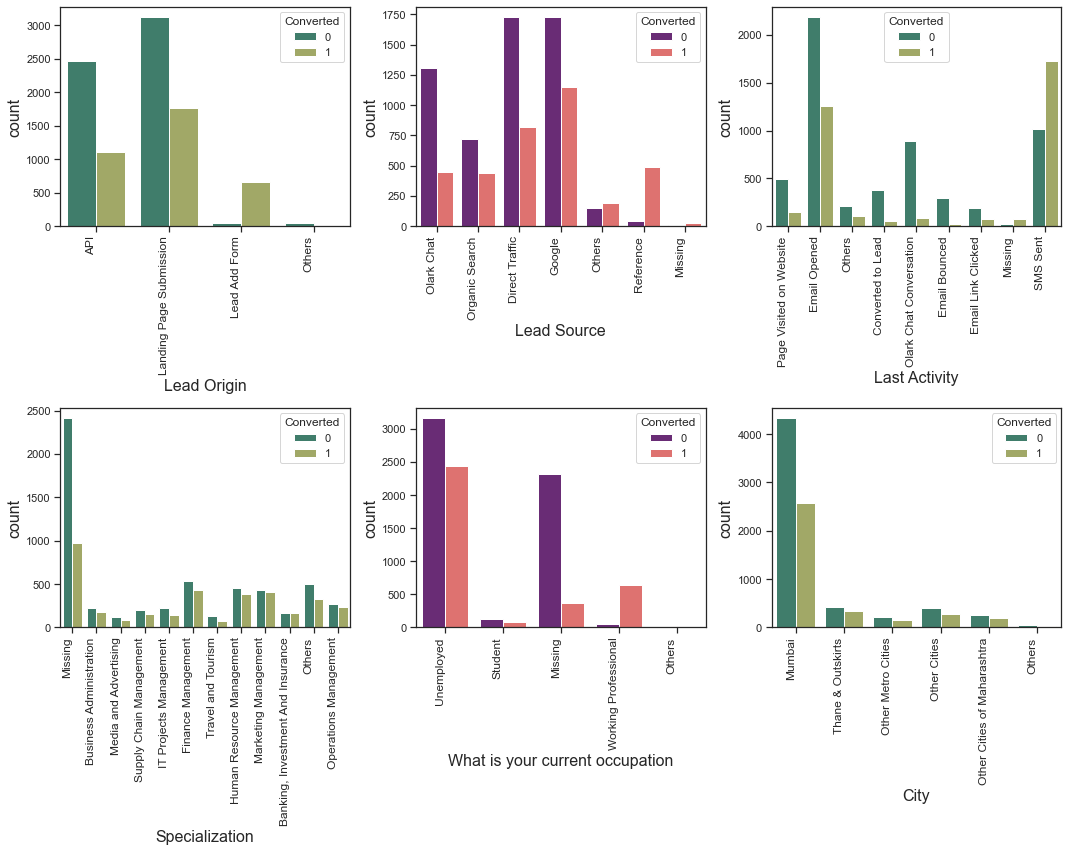

In [1529]:
# Count plot for the categorical variables
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (15, 12))
colors = [ 'gist_earth', 'magma' , 'gist_earth'] * 2
for i, x_var in enumerate(catFeatures):
    plt.subplot(2, 3, i+1)
    chart = sns.countplot(x = x_var, hue = 'Converted', data = df, palette = colors[i])
    chart.set_xticklabels(chart.get_xticklabels(), fontsize=12, rotation=90, ha='right')
    plt.xlabel(x_var, fontsize=16)
    plt.ylabel('count', fontsize=16)
    plt.tight_layout()

In [1530]:
#To find percent of Nan values 
missing_data(df).head()

,count_missing,percent_missing
A free copy of Mastering The Interview,0,0.00
City,0,0.00
What is your current occupation,0,0.00
Specialization,0,0.00
Last Activity,0,0.00


**There are no missing values and we can proceed with the model building**

-------------

## <span style="color:grey"> 4. Model Building
    
Now that the data analysis is completed, data is cleaned and outliers handled, we can proceed to building the model. 

### <span style="color:grey"> Get Dummy Variables:
    
* For all the categorical features, dummy variables need to be created.
* Instead of dropping the first dummy varibale for each categorical variable (using drop_first = True), we can select a specified dummy variable and drop it, so that we can have explainable features. 

In [1531]:
catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City']

In [1532]:
# Getting dummy variables and adding the results to the master dataframe

for each in catFeatures:
    dummy = pd.get_dummies(df[each], drop_first=False, prefix=each)
    df = pd.concat([df,dummy],1)
    print (f'dummy columns are added for the feature {each}')

dummy columns are added for the feature Lead Origin
dummy columns are added for the feature Lead Source
dummy columns are added for the feature Last Activity
dummy columns are added for the feature Specialization
dummy columns are added for the feature What is your current occupation
dummy columns are added for the feature City


In [1533]:
# Drop the sepcific dummy columns created after the dummy variables are added for these categorical columns

dummydropFeatures = ['Lead Origin_Others', 
                     'City_Others',
                     'Lead Source_Missing',
                     'Specialization_Missing',
                     'What is your current occupation_Missing',
                     'Last Activity_Missing']

df.drop(dummydropFeatures, axis=1, inplace=True )

In [1534]:
catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City']

In [1535]:
# Drop the original categorical columns since the dummy variables are added for these categorical columns

df.drop(catFeatures, axis=1, inplace=True )

In [1536]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,5.00,674,2.50,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,1,2.00,1532,2.00,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1.00,305,1.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,1,2.00,1428,1.00,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [1537]:
df.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Ma

###  Train-Test Split and Logistic Regression Model Building:

The following steps are followed in building a model: 
    
* Import the necessary packages for model preprocessing and model building
* Split the train data and test data at 70% and 30%
* Scale the Numeric features using MinMaxScaler
* Build the model using a combination of automatic and manual processing
* Start the model with RFE features (automatic) and use feature reduction by dropping one feature at a time. 
* Build the model and fit the training data.

In [1538]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1539]:
# The target variable in y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1540]:
# The feature variables in X

X=df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,5.00,674,2.50,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,2.00,1532,2.00,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,1.00,305,1.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,2.00,1428,1.00,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


**Splitting the data into train and test**

In [1541]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=101)

### Scaling the Numerical features 
    
* The Numeric features need to be scaled before building the model. 
* 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' are the numeric features to be scaled. 

In [1542]:
numFeatures

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [1543]:
#### Scaling the numerical columns
scaler = MinMaxScaler()

X_train[numFeatures] = scaler.fit_transform(X_train[numFeatures])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
4746,0,0.24,0.01,0.44,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
6279,0,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2352,1,0.00,0.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
723,0,0.29,0.15,0.28,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
6375,0,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


###  Build the Logistic Regression model with RFE features

In [1544]:
# Build the Logistic Regression Model
logmodel = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logmodel, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1545]:
#list of RFE supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Finance Management',
       'Specialization_Marketing Management',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [1546]:
# Defining a function to generate the model by passing the model name and the columns used for the model 

def gen_model(model_no, cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model_no = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = model_no.fit()
    print (res.summary())
    return res

In [1547]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calcVIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model - Iteration 1

In [1548]:
# Generate the first model using the RFE features

logm1 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm1, cols)

# Check the VIF for the features
calcVIF(cols).head(5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.7
Date:                Sun, 28 Mar 2021   Deviance:                       5307.5
Time:                        21:46:37   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,6.00
1,TotalVisits,4.46
5,Lead Origin_Lead Add Form,4.33
7,Lead Source_Reference,4.03
4,Lead Origin_Landing Page Submission,3.56


In [1549]:
res

---------------

### Building Iterations of the model after reducing the features
    
The next step is to build iterations of the model after dropping one feature at a time using P values and VIFs

### Model - Iteration 2

In [1550]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Supply Chain Management',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.6
Date:                Sun, 28 Mar 2021   Deviance:                       5311.2
Time:                        21:46:38   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,6.00
1,TotalVisits,4.46
5,Lead Origin_Lead Add Form,4.33
7,Lead Source_Reference,4.03
4,Lead Origin_Landing Page Submission,3.49


-------------------

### Model - Iteration 3

In [1551]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Banking, Investment And Insurance',1)
logm3 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm3, cols)

# Check the VIF for the features
calcVIF(cols).head(5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.2
Date:                Sun, 28 Mar 2021   Deviance:                       5314.4
Time:                        21:46:38   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,5.99
1,TotalVisits,4.46
5,Lead Origin_Lead Add Form,4.33
7,Lead Source_Reference,4.02
4,Lead Origin_Landing Page Submission,3.44


------

### Model - Iteration 4

In [1552]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Finance Management',1)
logm4 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm4, cols)

# Check the VIF for the features
calcVIF(cols).head(5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.5
Date:                Sun, 28 Mar 2021   Deviance:                       5317.0
Time:                        21:46:38   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,5.99
1,TotalVisits,4.46
5,Lead Origin_Lead Add Form,4.33
7,Lead Source_Reference,4.01
4,Lead Origin_Landing Page Submission,3.32


-----

### Model - Iteration 5

In [1553]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Marketing Management',1)
logm5 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm5, cols)

# Check the VIF for the features
calcVIF(cols).head(5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.8
Date:                Sun, 28 Mar 2021   Deviance:                       5323.6
Time:                        21:46:38   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,5.99
1,TotalVisits,4.46
5,Lead Origin_Lead Add Form,4.33
7,Lead Source_Reference,4.00
4,Lead Origin_Landing Page Submission,3.27


-------------

### Model - Iteration 6

In [1554]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Lead Source_Reference',1)
logm6 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm6, cols)

# Check the VIF for the features
calcVIF(cols).head(5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.4
Date:                Sun, 28 Mar 2021   Deviance:                       5332.7
Time:                        21:46:38   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,5.99
1,TotalVisits,4.46
4,Lead Origin_Landing Page Submission,3.27
13,What is your current occupation_Unemployed,2.93
7,Last Activity_Email Opened,2.51


-------------

### Model - Iteration 7

In [1555]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Page Views Per Visit',1)
logm7 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm7, cols)

# Check the VIF for the features
calcVIF(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.2
Date:                Sun, 28 Mar 2021   Deviance:                       5342.3
Time:                        21:46:38   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Lead Origin_Landing Page Submission,3.07
12,What is your current occupation_Unemployed,2.91
1,TotalVisits,2.69
6,Last Activity_Email Opened,2.38
2,Total Time Spent on Website,2.20
9,Last Activity_SMS Sent,2.18
5,Lead Source_Olark Chat,1.93
7,Last Activity_Olark Chat Conversation,1.57
4,Lead Origin_Lead Add Form,1.41
13,What is your current occupation_Working Profes...,1.37


-------------

-----------------

### <span style="color:grey"> 5 Getting the predicted values on the train set
    
The following steps are done after building the model
    
* Get the predictions on the training dataset with the final model 
* Use the cut-off with 0.5 for the initial predictions
* Derive the Classification report and Classification metrics with the initial cutoff and predictions
* Derive the Area under the ROC curve for the initial cut-off and predictions
* Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff
* Plot the Sensitivity / Specificity curve for the different cut-offs and identify the optimal cut-off
* Get the final_Predictions and the metrics for the Predictions with the optimal cut-off
* Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions
* Measuring the Precision Recall Trade-off

**Get the predictions on the training dataset with the final model.**
* Use the cut-off with 0.5 for the initial predictions.

In [1556]:
# Getting the predicted values on the train set

X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4746   0.30
6279   0.84
2352   0.01
723    0.21
6375   0.97
2827   0.37
5030   0.64
114    0.44
7050   0.62
6516   0.06
dtype: float64

In [1557]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
4746,0,0.30,4746
6279,1,0.84,6279
2352,0,0.01,2352
723,0,0.21,723
6375,1,0.97,6375


In [1558]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
4746,0,0.30,4746,0
6279,1,0.84,6279,1
2352,0,0.01,2352,0
723,0,0.21,723,0
6375,1,0.97,6375,1


### <span style="color:grey">  Evaluation Metrics for the Train dataset
    
**Derive the Classification report and Classification metrics with the initial cutoff and predictions**

In [1559]:
from sklearn.metrics import classification_report

In [1560]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3963
           1       0.79      0.69      0.74      2505

    accuracy                           0.81      6468
   macro avg       0.81      0.79      0.79      6468
weighted avg       0.81      0.81      0.81      6468



In [1561]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [1562]:
def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    # Let's check the overall accuracy.
    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    TP = confusion[1,1] # true positive 

    # Calculate the different Metrics
    Sensitivity = TP / float(TP+FN) # calculate Sensitivity
    Specificity = TN / float(TN+FP) # calculate specificity
    Precision   = TP / float(TP+FP) # calculate Precision
    Recall      = TN / float(TN+FP) # calculate Recall
    FPR = (FP/ float(TN+FP))        # Calculate False Postive Rate - predicting conversion when customer does not convert
    PPV = (TP / float(TP+FP))       # positive predictive value 
    NPV = (TN / float(TN+ FN))      # Negative predictive value
    
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    # Print the Metrics
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)} ({Accuracy})')
    print (f'The Sensitivity is : {round (Sensitivity,2)} ({Sensitivity})')
    print (f'The Specificity is : {round (Specificity,2)} ({Specificity})')
    print (f'The Precision is   : {round (Precision, 2)} ({Precision})')
    print (f'The Recall is      : {round (Recall, 2)} ({Recall})')
    print (f'The f1 score is    : {round (F1, 2)} ({F1})')
    print (f'The False Positive Rate is       : {round (FPR, 2)} ({FPR})')
    print (f'The Positive Predictive Value is : {round (PPV, 2)} ({PPV})')
    print (f'The Negative Predictive Value is : {round (NPV, 2)} ({NPV})')


In [1563]:
def plot_confusion_metrics(actual, predicted):
    sns.set_style('white')
    cm = confusion_matrix(actual, predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('True Converted and Predicted Converted Confusion Matrix', fontsize=14)
    plt.ylabel('True Converted', fontsize=14)
    plt.xlabel('Predicted Converted', fontsize=14)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=14)
    plt.yticks(tick_marks, classNames, fontsize=14)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=14, ha='center')
    plt.show()

In [1564]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

The Confusion Matrix is 
 [[3501  462]
 [ 767 1738]]
The Accuracy is    : 0.81 (0.8099876314162029)
The Sensitivity is : 0.69 (0.693812375249501)
The Specificity is : 0.88 (0.8834216502649508)
The Precision is   : 0.79 (0.79)
The Recall is      : 0.88 (0.8834216502649508)
The f1 score is    : 0.83 (0.8341031127436568)
The False Positive Rate is       : 0.12 (0.1165783497350492)
The Positive Predictive Value is : 0.79 (0.79)
The Negative Predictive Value is : 0.82 (0.82029053420806)


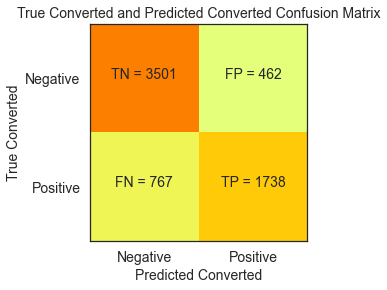

In [1565]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

**Derive the Area under the ROC curve for the initial cut-off and predictions**

**ROC curve demonstrates several things:**
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1566]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [1567]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob, drop_intermediate = False )

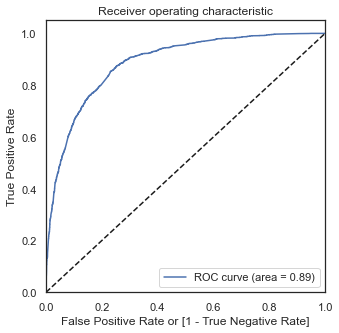

In [1568]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

###  <span style="color:grey">Getting the Optimal cutoff and final evaluation Metrics for Train Dataset
    
**Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff**

In [1569]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4746,0,0.30,4746,0,1,1,1,1,0,0,0,0,0,0
6279,1,0.84,6279,1,1,1,1,1,1,1,1,1,1,0
2352,0,0.01,2352,0,1,0,0,0,0,0,0,0,0,0
723,0,0.21,723,0,1,1,1,0,0,0,0,0,0,0
6375,1,0.97,6375,1,1,1,1,1,1,1,1,1,1,1


In [1570]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

**Plot the Sensitivity / Specificity curve for the different cut-offs and identify the optimal cut-off**

In [1571]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

#     TN = confusion[0,0] # true negatives
#     FP = confusion[0,1] # false positives
#     FN = confusion[1,0] # false negatives
#     TP = confusion[1,1] # true positive 
    
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00      0.39         1.00         0.00
0.10         0.10      0.61         0.98         0.38
0.20         0.20      0.76         0.92         0.65
0.30         0.30      0.79         0.88         0.74
0.40         0.40      0.81         0.77         0.84
0.50         0.50      0.81         0.69         0.88
0.60         0.60      0.80         0.63         0.91
0.70         0.70      0.78         0.51         0.94
0.80         0.80      0.76         0.43         0.97
0.90         0.90      0.70         0.26         0.99


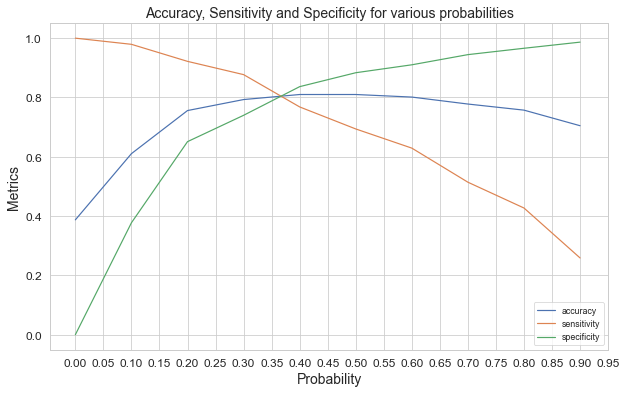

In [1572]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

####  From the curve above, 0.36 can be taken as the optimum point to take it as a cutoff probability

**Get the final_Predictions and the metrics for the Predictions with the optimal cut-off**

In [1573]:
#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
4746,0,0.30,4746,0,1,1,1,1,0,0,0,0,0,0,0
6279,1,0.84,6279,1,1,1,1,1,1,1,1,1,1,0,1
2352,0,0.01,2352,0,1,0,0,0,0,0,0,0,0,0,0
723,0,0.21,723,0,1,1,1,0,0,0,0,0,0,0,0
6375,1,0.97,6375,1,1,1,1,1,1,1,1,1,1,1,1


In [1574]:
# Get all the necessary Metrics for the Training dataset for cut-off 0.36
print (f'The Final Evaluation Metrics for the train Dataset: ')
print (f'----------------------------------------------------')

get_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

The Final Evaluation Metrics for the train Dataset: 
----------------------------------------------------
The Confusion Matrix is 
 [[3205  758]
 [ 512 1993]]
The Accuracy is    : 0.8 (0.8036487322201608)
The Sensitivity is : 0.8 (0.7956087824351298)
The Specificity is : 0.81 (0.8087307595256119)
The Precision is   : 0.72 (0.7244638313340603)
The Recall is      : 0.81 (0.8087307595256119)
The f1 score is    : 0.76 (0.7642815700714332)
The False Positive Rate is       : 0.19 (0.1912692404743881)
The Positive Predictive Value is : 0.72 (0.7244638313340603)
The Negative Predictive Value is : 0.86 (0.8622545063223029)


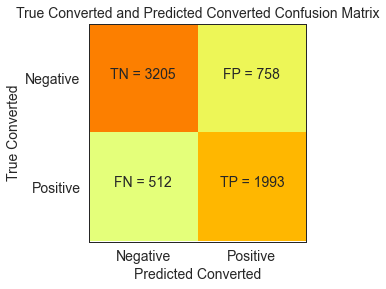

In [1575]:
# Plot Confusion metrics for final predicted for train data

plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [1576]:
# Classification report for the training dataset
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3963
           1       0.72      0.80      0.76      2505

    accuracy                           0.80      6468
   macro avg       0.79      0.80      0.80      6468
weighted avg       0.81      0.80      0.81      6468



**Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions**

In [1577]:
# Assign a Lead score based on the predictions

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
4746,0,0.30,4746,0,30
6279,1,0.84,6279,1,84
2352,0,0.01,2352,0,1
723,0,0.21,723,0,21
6375,1,0.97,6375,1,97


In [1578]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
4746,0,0.30,4746,0,1,1,1,1,0,0,0,0,0,0,0,30
6279,1,0.84,6279,1,1,1,1,1,1,1,1,1,1,0,1,84
2352,0,0.01,2352,0,1,0,0,0,0,0,0,0,0,0,0,1
723,0,0.21,723,0,1,1,1,0,0,0,0,0,0,0,0,21
6375,1,0.97,6375,1,1,1,1,1,1,1,1,1,1,1,1,97


#### Measuring the Precision Recall Trade-off

In [1579]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

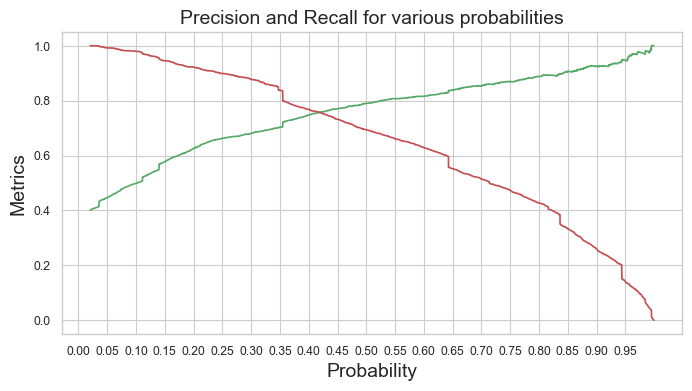

In [1580]:
# Plot the Precision / Recall tradeoff chart
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

--------------

## <span style="color:grey"> 6. Model Validation 
    
The next step is to validate the model with the test dataset. 

The following are the steps invoved:
* Fit the Numeric features of the Test dataset with the Scaler method
* Making Predictions on the X_test dataset
* Create a Dataset with the Prospect ID and the conversion probability for the test dataset
* Generate the Lead Score for the test dataset based on the predicted probability from the model
* Get the final Predicted values using the optimal threshold value
* Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values

    
### Making Predictions for the Test Dataset

In [1581]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
4637,0,2.00,69,2.00,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
356,0,5.00,1216,2.50,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
8615,1,2.00,267,2.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
7115,0,10.00,144,5.00,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
5743,1,6.00,378,3.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


**Fit the Numeric features of the Test dataset with the Scaler method**

In [1582]:
# Fit the Numeric features of the Test dataset with the Scaler method
X_test[numFeatures] = scaler.transform(X_test[numFeatures])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
4637,0,0.12,0.03,0.22,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
356,0,0.29,0.54,0.28,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
8615,1,0.12,0.12,0.22,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
7115,0,0.59,0.06,0.56,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
5743,1,0.35,0.17,0.33,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [1583]:
X_test.shape

(2772, 42)

In [1584]:
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

**Making Predictions on the X_test dataset using the final model**

In [1585]:
# Making Predictions on the X_test dataset

X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4637,0,0.12,0.03,1,0,0,0,0,0,0,0,0,1,0
356,0,0.29,0.54,1,0,0,1,0,0,0,0,0,0,1
8615,1,0.12,0.12,1,0,0,0,0,0,1,0,0,1,0
7115,0,0.59,0.06,1,0,0,0,0,0,0,0,0,1,0
5743,1,0.35,0.17,1,0,0,0,0,0,1,0,0,1,0


In [1586]:
y_test_pred = res.predict(X_test_sm)

In [1587]:
y_test_pred[:5]

4637   0.06
356    0.95
8615   0.14
7115   0.11
5743   0.21
dtype: float64

**Create a Dataset with the Prospect ID and the conversion probability for the test dataset**

In [1588]:
# Converting y_pred to a dataframe from an array
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_pred_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_testest_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.06,4637
1,1,0.95,356
2,0,0.14,8615
3,0,0.11,7115
4,0,0.21,5743
5,1,0.53,3711
6,1,0.95,943
7,0,0.04,4236
8,0,0.20,4225
9,1,0.15,4635


**Generate the Lead Score for the test dataset based on the predicted probability from the model**

In [1589]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4637,0,0.06,6
1,356,1,0.95,95
2,8615,0,0.14,14
3,7115,0,0.11,11
4,5743,0,0.21,21


**Get the final Predicted values using the optimal threshold value**

In [1590]:
# Predict the final y values based on the threshold of 0.3
y_test_pred_final['final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.36 else 0)

y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4637,0,0.06,6,0
1,356,1,0.95,95,1
2,8615,0,0.14,14,0
3,7115,0,0.11,11,0
4,5743,0,0.21,21,0


###  Final Evaluation Metrics for the Test Dataset

**Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values**

In [1591]:
# Get all the necessary Metrics for the Test dataset 

print (f'The Final Evaluation Metrics for the test Dataset: ')
print (f'---------------------------------------------------')
get_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

The Final Evaluation Metrics for the test Dataset: 
---------------------------------------------------
The Confusion Matrix is 
 [[1388  328]
 [ 203  853]]
The Accuracy is    : 0.81 (0.8084415584415584)
The Sensitivity is : 0.81 (0.8077651515151515)
The Specificity is : 0.81 (0.8088578088578089)
The Precision is   : 0.72 (0.7222692633361558)
The Recall is      : 0.81 (0.8088578088578089)
The f1 score is    : 0.76 (0.7631151513901494)
The False Positive Rate is       : 0.19 (0.19114219114219114)
The Positive Predictive Value is : 0.72 (0.7222692633361558)
The Negative Predictive Value is : 0.87 (0.8724072910119421)


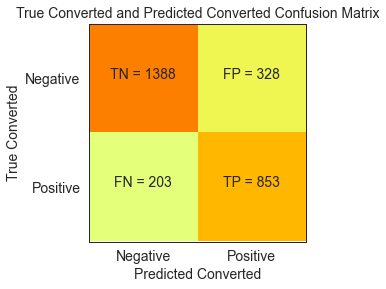

In [1592]:
# Plot Confusion metrics for final predicted for test data

plot_confusion_metrics(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

In [1593]:
# Print the classification report for the Test Dataset
print (classification_report(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1716
           1       0.72      0.81      0.76      1056

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.82      0.81      0.81      2772



----------

## <span style="color:grey"> 7. Assigning the Lead score for each Prospect ID from the original data

The final step is to merge the datasets from Train and Test datasets with the predicted Lead Score and attach the Lead score to the original dataset. 

In [1594]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
4746,0,0.30,4746,0,1,1,1,1,0,0,0,0,0,0,0,30
6279,1,0.84,6279,1,1,1,1,1,1,1,1,1,1,0,1,84
2352,0,0.01,2352,0,1,0,0,0,0,0,0,0,0,0,0,1
723,0,0.21,723,0,1,1,1,0,0,0,0,0,0,0,0,21
6375,1,0.97,6375,1,1,1,1,1,1,1,1,1,1,1,1,97


In [1595]:
# Create Dataset with y_train Prospect ID and Lead score
y_train_score = y_train_pred_final[['Prospect ID','Lead_Score']]

# Create Dataset with y_test Prospect ID and Lead score
y_test_score = y_test_pred_final[['Prospect ID','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
df_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Prospect ID to concatenate the score dataset to the original data
df_score.set_index('Prospect ID', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
df_orig = df_orig.join(df_score['Lead_Score'])

df_orig.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified,21
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened,41
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened,70
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified,19
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified,48


------------------

## <span style="color:grey"> 8. Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [1596]:
pd.options.display.float_format = '{:.2f}'.format
model_params = res.params[1:]
model_params

Do Not Email                                           -1.33
TotalVisits                                             1.00
Total Time Spent on Website                             4.49
Lead Origin_Landing Page Submission                    -0.32
Lead Origin_Lead Add Form                               3.61
Lead Source_Olark Chat                                  1.37
Last Activity_Email Opened                              0.72
Last Activity_Olark Chat Conversation                  -0.76
Last Activity_Others                                    0.92
Last Activity_SMS Sent                                  1.91
What is your current occupation_Others                  2.13
What is your current occupation_Student                 1.23
What is your current occupation_Unemployed              1.22
What is your current occupation_Working Professional    3.74
dtype: float64

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [1597]:
#feature_importance = abs(new_params)

feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -29.61
TotalVisits                                             22.30
Total Time Spent on Website                            100.00
Lead Origin_Landing Page Submission                     -7.07
Lead Origin_Lead Add Form                               80.37
Lead Source_Olark Chat                                  30.65
Last Activity_Email Opened                              16.04
Last Activity_Olark Chat Conversation                  -16.98
Last Activity_Others                                    20.60
Last Activity_SMS Sent                                  42.46
What is your current occupation_Others                  47.53
What is your current occupation_Student                 27.36
What is your current occupation_Unemployed              27.17
What is your current occupation_Working Professional    83.36
dtype: float64

#### Sorting the feature variables based on their relative coefficient values

In [1598]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             0
TotalVisits                                              7
Total Time Spent on Website                              3
Lead Origin_Landing Page Submission                      6
Lead Origin_Lead Add Form                                8
Lead Source_Olark Chat                                   1
Last Activity_Email Opened                              12
Last Activity_Olark Chat Conversation                   11
Last Activity_Others                                     5
Last Activity_SMS Sent                                   9
What is your current occupation_Others                  10
What is your current occupation_Student                  4
What is your current occupation_Unemployed              13
What is your current occupation_Working Professional     2
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

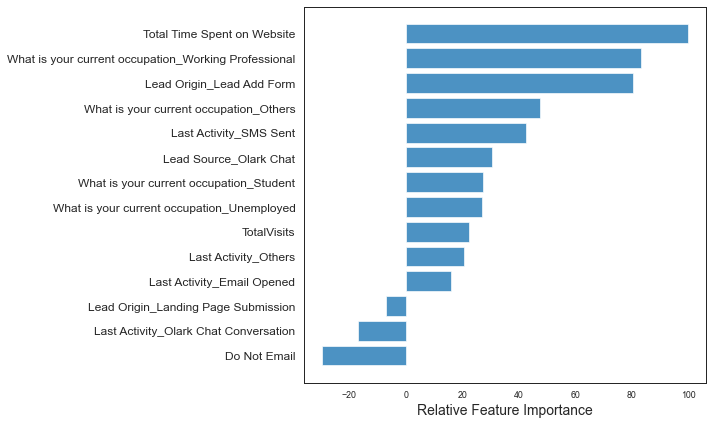

In [1599]:
# Plot bar graph to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[cols].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

---------------

## <span style="color:grey"> 9. Final Observations and Recommendations

####  The Final Evaluation Metrics for the train Dataset: 

* The Accuracy is    : 0.80
* The Sensitivity is : 0.80
* The Specificity is : 0.81
* The Precision is   : 0.73
* The Recall is      : 0.81
* The f1 score is    : 0.76
    
#### The Final Evaluation Metrics for the test Dataset: 

* The Accuracy is    : 0.81
* The Sensitivity is : 0.81
* The Specificity is : 0.81
* The Precision is   : 0.72
* The Recall is      : 0.81
* The f1 score is    : 0.76
    
####  X-Education has a better chance of converting a potential lead when:
* **The total time spent on the Website is high:**
Leads who have spent more time on the website have converted
* **Current Occupation is specified:**
Leads who are working professionals have high chances of getting converted. People who were looking for better prospects like Unemployed, students, Housewives and Business professionals were also good prospects to focus on. 
* **When the Lead origin was Lead Add form**
Leads who have responded/ or engaged through Lead Add Forms have had a higher chances of getting converted
* **Number of Total Visits were high** 
Leads who have made a greater number of visits have higher chances of getting converted. 
* **When the last activity was SMS sent or Email opened**
Members who have sent an SMS for enquiry or who have opened the email have a higher chance of getting converted.